In [35]:
x_mean = np.mean(x)
x_std = np.std(x)
stan = (x - x_mean) / x_std
destan = stan * x_std + x_mean

In [41]:
logit = np.log(ydata)/1-ydata


C:\Users\01.03\AppData\Local\Temp\ipykernel_9484\175924023.py:1: RuntimeWarning: divide by zero encountered in log
  logit = np.log(ydata)/1-ydata


 a = 7.18056955932655, b = 0.6201861097483007


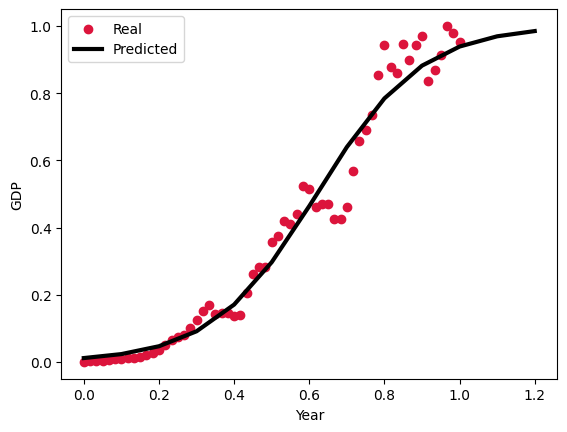

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Countries-GDP-1960-2020.csv')
y = np.array(df.iloc[3][2:], dtype=np.float64)
x = np.arange(1960, 2021)

def sigmoid(x, a, b):
    y = 1 / (1 + np.exp(-a * (x - b)))
    return y

xdata = (x - x.min()) / (x.max() - x.min())
ydata = (y - y.min()) / (y.max() - y.min())

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(f" a = {popt[0]}, b = {popt[1]}")

def ReLU(y):
    if y > 0:
    	return y
    else:
    	return 0

# y_ = ReLU(y)
# y__ = y_.all()
x_reg = np.arange(0,  1.3, 0.1)

# x_denorm = (xdata * (x.max() - x.min()) + x.min())
y_reg = sigmoid(x_reg, *popt)
logit = np.log(y_reg)/1-y_reg
# std_orig = np.std(x)
# mean_orig = np.mean(x)
popt_denorm = popt * x_std + x_mean
# y_denorm = sigmoid(x, *popt_denorm)
# y_2027 = sigmoid(2027, *popt_denorm)
# y_2027
x2027 = (2027 - x.min()) / (x.max() - x.min())
x_2027 = (x2027 * (x.max() - x.min()) + x.min())
plt.scatter(xdata, ydata, color='crimson', label='Real')
plt.plot(x_reg, y_reg, lw=3, label='Predicted', color='black')
# plt.scatter(x_2027, sigmoid(x_2027 , *popt), color='blue', label='2021')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [67]:
MSE = (np.sum(ydata - y_reg) ** 2) / x.size
MSE

ValueError: operands could not be broadcast together with shapes (61,) (13,) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Countries-GDP-1960-2020.csv')
y = np.array(df.iloc[3][2:], dtype=np.float64)
x = np.arange(1960, 2021)

def sigmoid(x, a, b):
    y = a + (b 1 / (1 + np.exp(-a * (x - b)))
    return y

xdata = (x - x.min()) / (x.max() - x.min())
ydata = (y - y.min()) / (y.max() - y.min())

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(f" a = {popt[0]}, b = {popt[1]}")

def ReLU(y):
    if y > 0:
    	return y
    else:
    	return 0

# y_ = ReLU(y)
# y__ = y_.all()
x_reg = np.arange(0,  1.3, 0.1)

# x_denorm = (xdata * (x.max() - x.min()) + x.min())
y_reg = sigmoid(x_reg, *popt)
logit = np.log(y_reg)/1-y_reg
# std_orig = np.std(x)
# mean_orig = np.mean(x)
popt_denorm = popt * x_std + x_mean
# y_denorm = sigmoid(x, *popt_denorm)
# y_2027 = sigmoid(2027, *popt_denorm)
# y_2027
x2027 = (2027 - x.min()) / (x.max() - x.min())
x_2027 = (x2027 * (x.max() - x.min()) + x.min())
plt.scatter(xdata, ydata, color='crimson', label='Real')
plt.plot(x_reg, y_reg, lw=3, label='Predicted', color='black')
# plt.scatter(x_2027, sigmoid(x_2027 , *popt), color='blue', label='2021')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()